# Analysis of Reported Crime in New York City

## Introduction

New York City (NYC) , colloquially called "New York", is one of the largest cities in the world. It's also one of the most influential cities, having a stronghold in finance and also starting to emerge as a tech center. It has it's own unique culture, and famous accent. With 8,175,133, it is the most populous city in the US.<sup>[1]</sup>

Large cities have a lot of opportunities for people. This, coupled with the pride of calling a big city home, is what typically motivates people to move to bigger cities. One negative aspect, however is usually higher crime rates. Bigger cities typically tend to have more crime as compared to smaller cities and suburbs. However, I have read numerous pieces of literature that claim that crime has been steadily falling in the city of New York. In fact, it is considered to be one of the safest large cities in the world. This project is motivated primarily by my interest to determine if crime has actually fallen, and if it has, by how much. 

NYC is divided into different boroughs. A borough is an administrative region. This enables easier administration of the city, since it has a really high population. There are 5 boroughs: Bronx, Manhattan, Brooklyn, Queens and Staten Island. Brooklyn is the most populous borough, while Staten Island is the least populated borough<sup>[3]</sup>. 

As a part of the NYC Open Data project, data on reported crime is available from 2006 to 2017. The data is very large (about 6 gigabytes). For my analysis, I use data from just 2006 and 2017. I answer 4 research questions using this data. 

## Reproducibility

In accordance with the principles of human centered data science, this research is fully reproducible. All the data required for this analysis is packaged into this repository, and no additional data needs to be downloaded. The data is split into two parts due to Github limitations on file size. I've overcome this limitation by splitting both the year files into two different subset CSVs. The code takes care of assembling the files, so the user does not have to worry about this aspect. 

All the findings of this research are visible in the notebook. The analysis can be re-run, rendering the same results as shown right here. The steps to run this analysis are shown below:

    - Clone the repository by running this command: git clone https://github.com/tejasmhos/data-512-final-project
    - Make sure that Python 3.6 is installed, along with the Python packages Pandas, Matplotlib, Numpy and Seaborn.
    - Execute the cells by hitting shift+enter. 
    
## Data

I used the NYPD Complaint Data Historic dataset.<sup>[2]</sup> According to the webpage, this dataset "includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017)." The data is available as a part of the NYC OpenData program. This data is publicly available and there are no restrictions regarding the usage of the data.

The entire dataset is not being used, I use just a subset of the data containing complaints from 2006 and 2017. I took the original data and subsetted it to include just those two years. That is what is included in this repository, and is all you require to product reproducible results.

The first step is importing the modules that we require for this analysis. The module imports are performed in the cell below. In addition, warnings are suppressed to make the output much more cleaner.

In [2]:
#module imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
warnings.filterwarnings('ignore')

The next step is importing the data that we use for this analysis. Since Github has an individual file size limit of 100 megabytes, I divided the data by year. Additionally, each year of data is divided into two parts since those exceed 100 megabytes as well. The data is then stitched together automatically so the user doesn't have to worry about doing this.

In [3]:
#importing our data
data_2006_1 = pd.read_csv("data/2006_crime_data_1.csv", low_memory=False)
data_2006_2 = pd.read_csv("data/2006_crime_data_2.csv", low_memory=False)
data_2006 = pd.concat([data_2006_1, data_2006_2])

data_2017_1 = pd.read_csv("data/2017_crime_data_1.csv", low_memory=False)
data_2017_2 = pd.read_csv("data/2017_crime_data_2.csv", low_memory=False)
data_2017 = pd.concat([data_2017_1, data_2017_2])

After the initial setup procedure, I then move on to my analysis phase, where I answer four different research questions that use the given dataset.

## Research Question 1: How clean is the data? Are there any obvious problems or issues with the numbers?

The first step that I perform is checking the number of rows that are present in each year. I want to make sure that one dataset doesn't have a ridiculously larger or smaller number of rows, as this might indicate an issue with the data. 

In [4]:
#printing the number of rows and columns in our dataset
print(data_2006.shape)
print(data_2017.shape)

(529026, 35)
(458223, 35)


This issue does not appear to be present. The size of each of the datasets is different, which is a given. There does not appear to be anything anomalous with respect to the size of each dataset. 

The final step that I perform in this analysis is checking and making sure that the columns that I will be using do not have null values. Especially of importance are CMPLNT_FR_DT and OFNS_DESC, which contain the date of the complain and the description of the offense respectively.

In [121]:
data_2017.isnull().sum(axis = 0)

CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT          71167
CMPLNT_TO_TM          70968
ADDR_PCT_CD               0
RPT_DT                    0
KY_CD                     0
OFNS_DESC                22
PD_CD                   269
PD_DESC                 269
CRM_ATPT_CPTD_CD          0
LAW_CAT_CD                0
BORO_NM                 272
LOC_OF_OCCUR_DESC     89579
PREM_TYP_DESC          1752
JURIS_DESC                0
JURISDICTION_CODE       269
PARKS_NM             454125
HADEVELOPT           434357
HOUSING_PSA          421288
X_COORD_CD               32
Y_COORD_CD               32
SUSP_AGE_GROUP       119513
SUSP_RACE            119513
SUSP_SEX             119513
TRANSIT_DISTRICT     446470
Latitude                 32
Longitude                32
Lat_Lon                  32
PATROL_BORO             269
STATION_NAME         446470
VIC_AGE_GROUP             1
VIC_RACE                  1
VIC_SEX                   1
dtype: int64

The complaint data looks fine, however the offense description has 22 null values. I remove these rows to ensure that there is nothing that impedes my analysis.

In [122]:
data_2017 = data_2017.dropna(subset=["OFNS_DESC"])
data_2006 = data_2006.dropna(subset=["OFNS_DESC"])

I finally have one final look at the first few rows of the data to get an idea of how it looks. The data looks fine. I have already converted the CMPLNT_FR_DT to a datetime format to ensure that I can use it to answer a research question that I investigate further into my analysis. Everything looks perfect to move onto the next step.

In [30]:
data_2006.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,387166595,2006-07-01,12:00:00,2009-11-22,12:00:00,70.0,08/28/2013,340,FRAUDS,718.0,...,NaN,NaN,40.624542,-73.956168,"(40.62454224, -73.956167736)",PATROL BORO BKLYN SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F
1,547657614,2006-01-01,00:01:00,2009-01-01,23:59:00,76.0,08/21/2013,104,RAPE,157.0,...,M,NaN,40.683879,-74.000326,"(40.683879057, -74.000325948)",PATROL BORO BKLYN SOUTH,NaN,18-24,WHITE HISPANIC,F
2,758471860,2006-01-01,10:00:00,2013-08-05,14:00:00,75.0,08/10/2013,112,THEFT-FRAUD,739.0,...,NaN,NaN,40.661964,-73.889912,"(40.66196424, -73.889912338)",PATROL BORO BKLYN NORTH,NaN,65+,BLACK,M
3,224671080,2006-01-01,12:00:00,2013-07-24,15:45:00,122.0,07/31/2013,112,THEFT-FRAUD,739.0,...,NaN,NaN,40.592705,-74.091253,"(40.592704924, -74.091252927)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
4,376611280,2006-01-01,00:01:00,2006-01-01,23:59:00,73.0,07/30/2013,104,RAPE,157.0,...,M,NaN,40.670655,-73.913391,"(40.670655072, -73.91339092)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F


## Research Question 2: What's the overall trend in the number of reported incidents in 2006 as compared to 2017 in NYC? How about the trend in crimes reported on a borough basis?

Without giving any consideration to the nature of the crime, I want to see how the numbers compare between 2006 and 2017. I want to do this for the whole city, and then investigate the numbers for each borough and see how they look like. My hypothesis is that the overall and borough numbers have fallen from 2006 to 2017, as most literature available online seems to say so. It will be interesting to see if this actually holds true.

To begin with, I check how number of reported crimes in 2006 compare with 2017.

In [124]:
# Analyzing the total number of crimes that were reported in 2006 vs 2017 for the city as a whole
print("The total number of reported crimes in 2006 was:", data_2006.shape[0])
print("The total number of reported crimes in 2017 was:", data_2017.shape[0])
print("The percentage change in reported crimes in 2017 versus 2006 is", ((data_2017.shape[0]-data_2006.shape[0])/\
        data_2006.shape[0])*100)

The total number of reported crimes in 2006 was: 525421
The total number of reported crimes in 2017 was: 458201
The percentage change in reported crimes in 2017 versus 2006 is -12.793550314890345


This is a pretty drastic change in crime in the city. We observe a nearly 13% decrease in reported crime from 2006 to 2017. This is a pretty impressive statistic, given that population from 2006 to 2017 increased by 9.09% in NYC. In terms of absolute numbers, this accounts to a decrease of 67,220. 

The next step required to answer this research question is computing these statistics for each borough. The code below performs this computation.

In [125]:
# Analyzing the total number of crimes that were reported in 2006 vs 2017 on a borough basis
crime_2006_borough = data_2006.groupby(['BORO_NM'])['CMPLNT_NUM'].count()
crime_2017_borough = data_2017.groupby(['BORO_NM'])['CMPLNT_NUM'].count()
crime_boroughwise = pd.concat([crime_2006_borough, crime_2017_borough], axis=1)
crime_boroughwise.columns = ['2006', '2017']

In [126]:
#Analyzing change in number of reported crimes by Borough
for i, r in crime_boroughwise.iterrows():
    print("Crime in", i, "witnessed a percentage change of", ((r['2017']-r['2006'])/r['2006'])*100, "from 2006 to 2017")

Crime in BRONX witnessed a percentage change of -8.023861841030017 from 2006 to 2017
Crime in BROOKLYN witnessed a percentage change of -14.125846479537833 from 2006 to 2017
Crime in MANHATTAN witnessed a percentage change of -11.617571468111185 from 2006 to 2017
Crime in QUEENS witnessed a percentage change of -14.480672976619996 from 2006 to 2017
Crime in STATEN ISLAND witnessed a percentage change of -22.61263603610296 from 2006 to 2017


The numbers above are pretty impressive. All boroughs witnessed a downward trend in reported crimes, with Staten Island leading at 22.61%! Bronx witnessed the least decrease in reported crime at 8.024%, Manhattan witnessed a decrease of 11.62%, while Brooklyn and Queens witnessed a decrease of 14.13% and 14.48% respectively. 

In [127]:
#Looking at absolute numbers
crime_boroughwise.head()

,2006,2017
BORO_NM,,
BRONX,110134,101297
BROOKLYN,156826,134673
MANHATTAN,126455,111764
QUEENS,104491,89360
STATEN ISLAND,26923,20835


The numbers clearly show that total crime reported in all boroughs has decreased from 2006 to 2017. In order to make the decline a little more clear, I plot the numbers from 2006 and 2017 in the bar chart below.

In [128]:
#Format the data for appropriate display
crime_boroughwise.reset_index(inplace=True)
crime_boroughwise = pd.melt(crime_boroughwise, id_vars="BORO_NM", var_name="year", value_name="num of reported crimes")

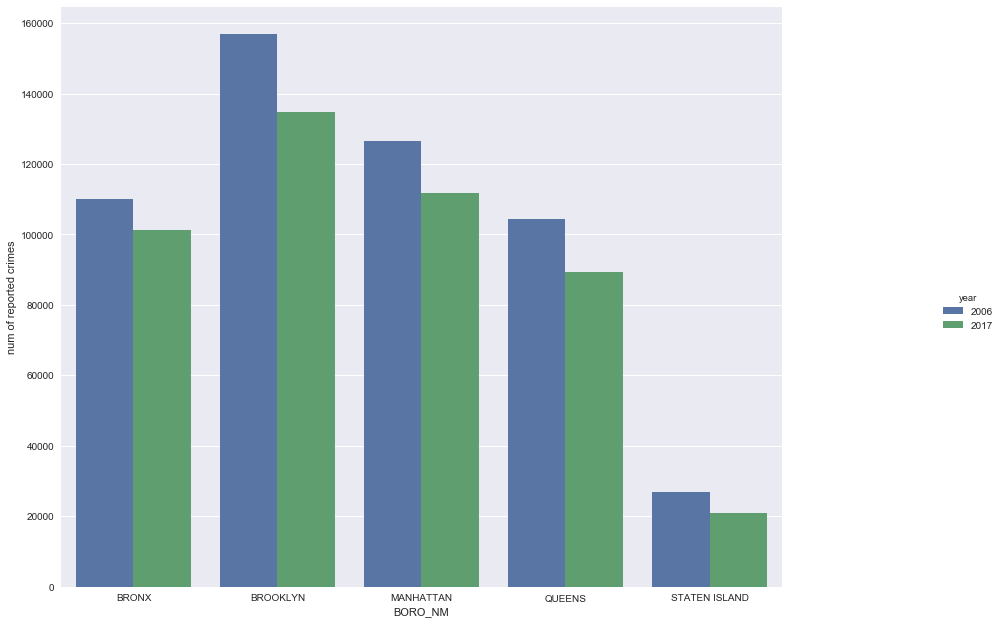

In [129]:
#Perform plotting
g=sns.factorplot(x='BORO_NM', y='num of reported crimes', hue='year', data=crime_boroughwise, kind='bar')
g.fig.set_size_inches(17, 10)

Visually representing numbers usually makes analysis easier. For this reason, I've plotted the reported number of crimes for each borough for 2006 and 2017. The downward trend in reported crime is now clearly visible. 

## Research Question 3: Taking into consideration the actual offense, how does the number look like when 2006 and 2017 are compared? How are the numbers when they are compared for the overall city and when they are split up according to the boroughs?

In this research question, I take into consideration the actual nature of the crime, and see how the numbers compare between 2006 and 2017. I do this on a overall city basis and borough basis. My hypothesis is again, that the numbers have fallen from 2006 to 2017.

The first step that I take is determining the number of different categories of crimes that are reported in the data. This is a pivotal step that will allow me to decide how I will proceed further into this investigation. 

In [17]:
#Getting the number of unique crimes for 2006 and 2017
print(data_2017["OFNS_DESC"].nunique())
print(data_2006["OFNS_DESC"].nunique())

62
59


The number of types of crimes do not match in 2006 and 2017. In order to make the research as meaningful as possible, I take the intersection of types of crimes and only consider those crimes that are present in both years. This will lead to a loss in rows of data, but makes more sense. If a crime type exists in 2006 and not in 2017 or vice versa, a comparison between them is all but impossible and doesn't make sense in the context of this research. 

In [8]:
#Using only those crimes common to both datasets
common_crimes = list(set(data_2006["OFNS_DESC"].unique()).intersection(set(data_2017["OFNS_DESC"].unique())))
data_2006_c = data_2006.loc[data_2006["OFNS_DESC"].isin(common_crimes)]
data_2017_c = data_2017.loc[data_2017["OFNS_DESC"].isin(common_crimes)]

There are a number of ways to bucket crimes into different categories. I use the method proposed in the Modernizing Crime Statistics Report 1: Defining and Classifying Crime (2016) study report <sup>[4]</sup>. Due to copyright rules, I cannot reproduce this classification in this report. The report is available for download free of cost, with the link available in the references section of this report. You are required to provide your email ID and agree to the terms of service of the site in order to download the report. 

The steps taken below are to perform rebucketing and ensure ease of interpretability. The names of these categories are really long, so I first map them to shorter names. The second step is developing the rebucketing dictionary. 

In [10]:
# mapping names in literature to shorter names
official_to_shorter_map = {"Acts leading to death or intending to cause death":"Deadly Crimes", 
                       "Acts causing harm or intending to cause harm to the person":"Harmful Crimes",
                       "Injurious acts of a sexual nature":"Sexual Crimes",
                       "Acts of violence or threatened violence against a person that involve property":"Property and Violence",
                       "Acts against property only":"Property Crimes",
                        "Acts involving controlled substances":"Controlled Substance",
                        "Acts involving fraud, deception, or corruption":"Fraud or Corruption",
                        "Acts against public order and authority":"Public Order",
                        "Acts against public safety and national security":"Safety and Security",
                        "Acts against the natural environment or against animals":"Environment and Animals",
                        "Other criminal acts not elsewhere classified":"Other Crimes"}

rebucketing_dictionary = {"Deadly Crimes":["MURDER & NON-NEGL. MANSLAUGHTER", "HOMICIDE-NEGLIGENT,UNCLASSIFIE", 
                                          "HOMICIDE-NEGLIGENT-VEHICLE"], "Harmful Crimes":["FELONY ASSAULT", "HARRASSMENT 2",
                                          "ASSAULT 3 & RELATED OFFENSES","OFFENSES AGAINST THE PERSON", "CHILD ABANDONMENT/NON SUPPORT",
                                          "KIDNAPPING & RELATED OFFENSES", "OFFENSES RELATED TO CHILDREN", "INTOXICATED/IMPAIRED DRIVING", 
                                          "CRIMINAL TRESPASS", "INTOXICATED & IMPAIRED DRIVING"], "Sexual Crimes":["RAPE", "SEX CRIMES"], "Property and Violence":["ROBBERY"], 
                                          "Property Crimes":["GRAND LARCENY", "PETIT LARCENY",
                                          "PETIT LARCENY OF MOTOR VEHICLE", "BURGLARY", "POSSESSION OF STOLEN PROPERTY", 
                                          "GRAND LARCENY OF MOTOR VEHICLE", "ARSON", "UNAUTHORIZED USE OF A VEHICLE", 
                                          "OTHER OFFENSES RELATED TO THEF", "BURGLAR'S TOOLS"], 
                                          "Controlled Substance":["DANGEROUS DRUGS"], "Fraud or Corruption":["FRAUDS", "THEFT-FRAUD", 
                                          "FORGERY", "OFFENSES INVOLVING FRAUD", "FRAUDULENT ACCOSTING"], "Public Order":["OFF. AGNST PUB ORD SENSBLTY &", 
                                          "PROSTITUTION & RELATED OFFENSES", "OFFENSES AGAINST PUBLIC ADMINI", 
                                          "ALCOHOLIC BEVERAGE CONTROL LAW", "NEW YORK CITY HEALTH CODE", "GAMBLING", "LOITERING/GAMBLING (CARDS, DIC", 
                                          "DISRUPTION OF A RELIGIOUS SERV"], "Safety and Security":["DANGEROUS WEAPONS", "UNLAWFUL POSS. WEAP. ON SCHOOL", 
                                          "OFFENSES AGAINST PUBLIC SAFETY"], "Environment and Animals":[],
                                          "Other Crimes":["MISCELLANEOUS PENAL LAW", "CRIMINAL MISCHIEF & RELATED OF", 
                                          "NYS LAWS-UNCLASSIFIED FELONY", "VEHICLE AND TRAFFIC LAWS", "ADMINISTRATIVE CODE", 
                                          "OTHER STATE LAWS (NON PENAL LA", "ANTICIPATORY OFFENSES", "ENDAN WELFARE INCOMP", "LOITERING", 
                                          "ESCAPE 3", "OTHER STATE LAWS", "JOSTLING"]}


This rebucketing operation is a very time consuming process, requiring around 4 hours to complete in total on both datasets. Keeping my user in mind, I have cached these tables to CSVs in this repository to make the analysis easier. In order to use the cached versions (faster), keep the enable_cached option unchanged. If you want to perform this operation yourself, set this option to False and execute the cells below.

In [29]:
#Use caching to speed up operation
enable_cache = True

In [31]:
def perform_bucketing(df):
    """
    This function rebuckets the different 
    """
    for i, row in df.iterrows():
        for key, value in rebucketing_dictionary.items():
            if row["OFNS_DESC"] in value:
                df.at[i, "bucketed"] = key
                break
    return df

In [32]:
#perform rebucketing
if enable_cache:
    data_2006_c1 = pd.read_csv("data/rebucketed_data/data_2006_rebuck_1.csv", low_memory=False)
    data_2006_c2 = pd.read_csv("data/rebucketed_data/data_2006_rebuck_2.csv", low_memory=False)
    data_2006_c = pd.concat([data_2006_c1, data_2006_c2])

    data_2017_c1 = pd.read_csv("data/rebucketed_data/data_2017_rebuck_1.csv", low_memory=False)
    data_2017_c2 = pd.read_csv("data/rebucketed_data/data_2017_rebuck_2.csv", low_memory=False)
    data_2017_c = pd.concat([data_2017_c1, data_2017_c2])

else:
    data_2006_c['bucketed'] = "to_fill"
    data_2017_c['bucketed'] = "to_fill"
    data_2006_c = perform_bucketing(data_2006_c)
    data_2017_c = perform_bucketing(data_2017_c)
    
    data_2006_c = data_2006_c[data_2006_c["bucketed"] != "to_fill"]

In [33]:
#Group by crime type, which is what we want 
data_2006_c1 = data_2006_c.groupby(['bucketed'])['CMPLNT_NUM'].count()
data_2006_c1.index.name = "Crime Type"
data_2017_c1 = data_2017_c.groupby(['bucketed'])['CMPLNT_NUM'].count()
data_2017_c1.index.name = "Crime Type"

In [34]:
#print the percentage changes for each category
for i in data_2006_c1.index:
    print("Percentage change in", i, "from 2006 to 2017 is", ((data_2017_c1[i]-data_2006_c1[i])/data_2006_c1[i])*100)

Percentage change in Controlled Substance from 2006 to 2017 is -30.48020005697825
Percentage change in Deadly Crimes from 2006 to 2017 is -49.534450651769085
Percentage change in Fraud or Corruption from 2006 to 2017 is -23.1454346951675
Percentage change in Harmful Crimes from 2006 to 2017 is -4.772774962325218
Percentage change in Other Crimes from 2006 to 2017 is -0.0014006975473785945
Percentage change in Property Crimes from 2006 to 2017 is -15.61060080410802
Percentage change in Property and Violence from 2006 to 2017 is -35.72853365496126
Percentage change in Public Order from 2006 to 2017 is -26.683725196736347
Percentage change in Safety and Security from 2006 to 2017 is -8.417373939091362
Percentage change in Sexual Crimes from 2006 to 2017 is -7.640878701050621


Each broader category of crime witnessed a decrease. What's encouraging to see is that deadly crime fell nearly 50%, which is very impressive. Other crimes that fell drastically include Control Substance related crimes, Fraud or Corruption crimes and Propert and Violence crimes. The crimes belonging to "Other Crimes", however, did not witness much of a fall, with a fall of a hundredths of a percent. 

In order to visually represent this information, I plot the number of each category of crime in both the years. The code below will modify the data and peform the plotting operation.

In [35]:
#combine the data for plotting purposes
data_city_plot = pd.concat([data_2006_c1, data_2017_c1], axis=1)
data_city_plot.columns = ['2006', '2017']

In [36]:
#perform a melt operation to get the columns that we need.
data_city_plot.reset_index(inplace=True)
data_city_plot = pd.melt(data_city_plot, id_vars="Crime Type", var_name="crime", value_name="num of reported crimes")

Text(0.5,0.98,'Crime Rate by Category in 2006 and 2017')

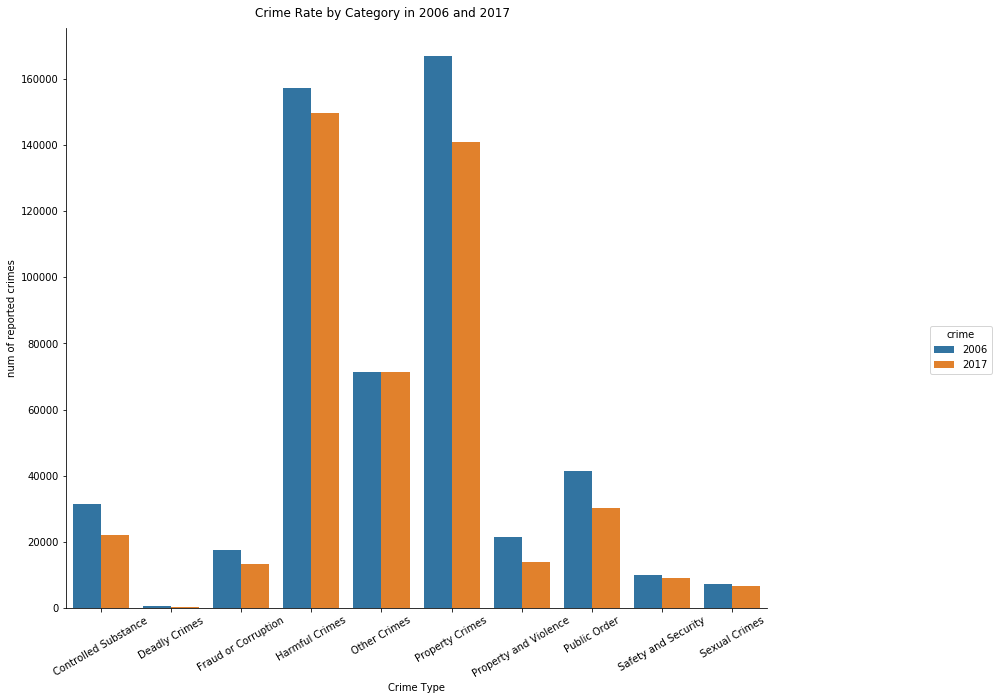

In [37]:
#set up the plotting operation and perform plotting
g1=sns.factorplot(x='Crime Type', y='num of reported crimes', hue='crime', data=data_city_plot, kind='bar')
g1.fig.set_size_inches(17, 10)
g1.set_xticklabels(rotation=30)
g1.fig.suptitle("Crime Rate by Category in 2006 and 2017")

The plot above visually shows how much the crime rates have fallen. As seen above, deadly crimes had a pretty large fall due to the number of deadly crimes in 2006 being quite small. Other crimes are nearly the same and this can be clearly seen once we plot the data.

What about the change in types of crimes in each borough? Since there are 5 different boroughs, I have developed a function below that reports the percentage change in crimes and plots the number of different types of crimes in 2006 and 2017. The function is called on data belonging to each borough.

In [50]:
def plot_by_borough(data_2006, data_2017, borough_name):
    """
    This function performs two functions. It first displays the
    percentage change in each type of crime for the borough provided.
    It then plots these values into a bar chart to make comparison
    easier.
    """
    data_2006_p = copy.deepcopy(data_2006)
    data_2017_p = copy.deepcopy(data_2017)
    
    data_2006_p = data_2006_p[data_2006_p["BORO_NM"] == borough_name]
    data_2017_p = data_2017_p[data_2017_p["BORO_NM"] == borough_name]
    data_2006_p = data_2006_p.groupby(['bucketed'])['CMPLNT_NUM'].count()
    data_2006_p.index.name = "Crime Type"
    data_2017_p = data_2017_p.groupby(['bucketed'])['CMPLNT_NUM'].count()
    data_2017_p.index.name = "Crime Type"
    
    data_city_plot = pd.concat([data_2006_p, data_2017_p], axis=1, join="inner")
    data_city_plot.columns = ['2006', '2017']
    data_city_plot.reset_index(inplace=True)
    for i, row in data_city_plot.iterrows():
        print("Percentage change in", row['Crime Type'], "from 2006 to 2017 is", ((row['2017']-row['2006'])/row['2006'])*100)
        
    data_city_plot = pd.melt(data_city_plot, id_vars="Crime Type", var_name="crime", value_name="num of reported crimes")
    g1=sns.factorplot(x='Crime Type', y='num of reported crimes', hue='crime', data=data_city_plot, kind='bar')
    g1.fig.set_size_inches(17, 10)
    g1.set_xticklabels(rotation=30)
    g1.fig.suptitle("Crime Rate in"+ " "+borough_name+ " "+"in 2006 and 2017")

Percentage change in Controlled Substance from 2006 to 2017 is -34.77129850422718
Percentage change in Deadly Crimes from 2006 to 2017 is -60.0
Percentage change in Fraud or Corruption from 2006 to 2017 is -15.180019461563413
Percentage change in Harmful Crimes from 2006 to 2017 is 0.43192812715964063
Percentage change in Other Crimes from 2006 to 2017 is 4.070748666711673
Percentage change in Property Crimes from 2006 to 2017 is -9.09980111505983
Percentage change in Property and Violence from 2006 to 2017 is -25.192918747162963
Percentage change in Public Order from 2006 to 2017 is -19.551979121357114
Percentage change in Safety and Security from 2006 to 2017 is -7.803700724054706
Percentage change in Sexual Crimes from 2006 to 2017 is -6.986301369863014


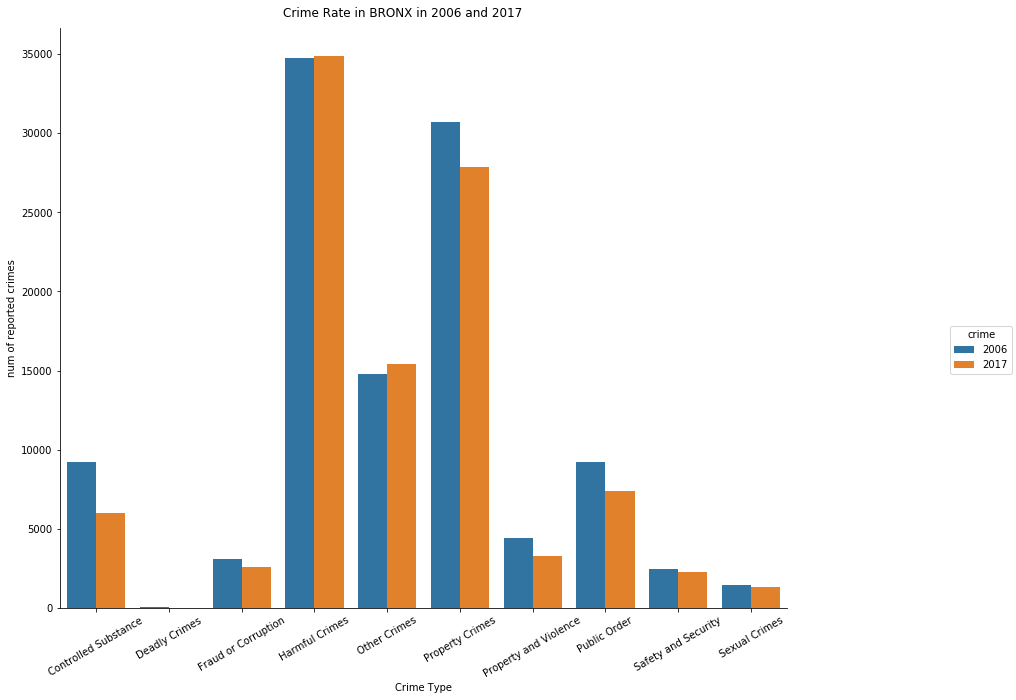

In [45]:
#Crime rates in Bronx
plot_by_borough(data_2006_c, data_2017_c, "BRONX")

Percentage change in Controlled Substance from 2006 to 2017 is -33.18431213168056
Percentage change in Deadly Crimes from 2006 to 2017 is -56.00000000000001
Percentage change in Fraud or Corruption from 2006 to 2017 is -15.044814340588989
Percentage change in Harmful Crimes from 2006 to 2017 is -7.883808724832214
Percentage change in Other Crimes from 2006 to 2017 is 0.3953295945573228
Percentage change in Property Crimes from 2006 to 2017 is -15.681271263795535
Percentage change in Property and Violence from 2006 to 2017 is -39.077532541029996
Percentage change in Public Order from 2006 to 2017 is -29.70264765784114
Percentage change in Safety and Security from 2006 to 2017 is -6.126760563380282
Percentage change in Sexual Crimes from 2006 to 2017 is -16.284881299458558


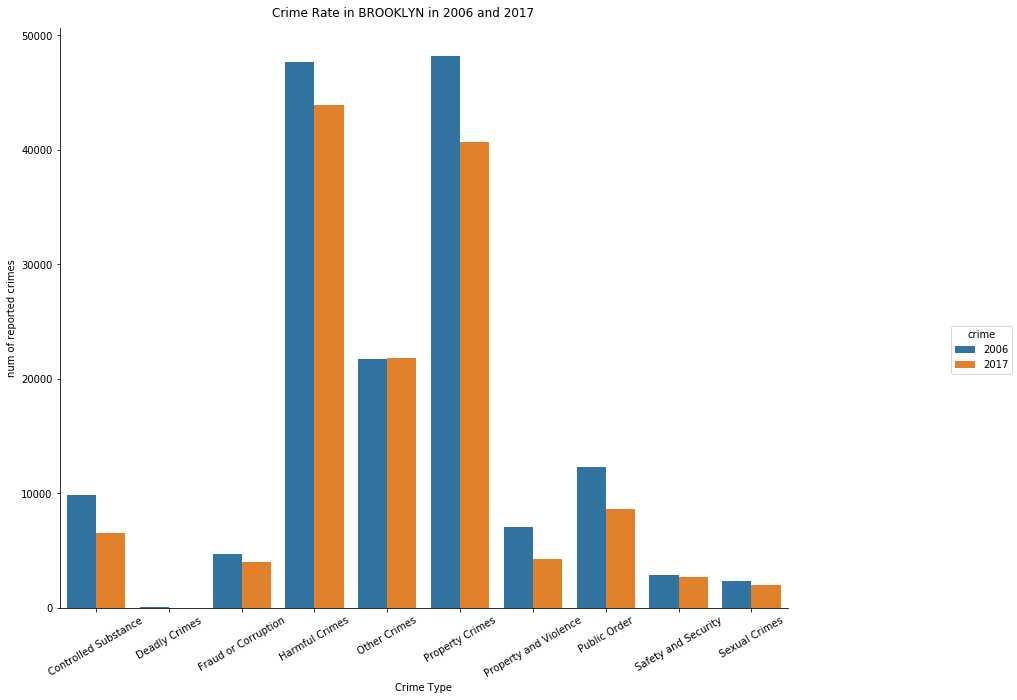

In [46]:
#Crime rates in Brooklyn by Crime
plot_by_borough(data_2006_c, data_2017_c, "BROOKLYN")

Percentage change in Controlled Substance from 2006 to 2017 is -19.856788763426053
Percentage change in Deadly Crimes from 2006 to 2017 is -54.54545454545454
Percentage change in Fraud or Corruption from 2006 to 2017 is -29.81444784723473
Percentage change in Harmful Crimes from 2006 to 2017 is -5.607077833409194
Percentage change in Other Crimes from 2006 to 2017 is 0.2897596312150148
Percentage change in Property Crimes from 2006 to 2017 is -13.510954530441484
Percentage change in Property and Violence from 2006 to 2017 is -39.59100204498978
Percentage change in Public Order from 2006 to 2017 is -21.797801719447165
Percentage change in Safety and Security from 2006 to 2017 is -0.7877664504170527
Percentage change in Sexual Crimes from 2006 to 2017 is 17.280813214739517


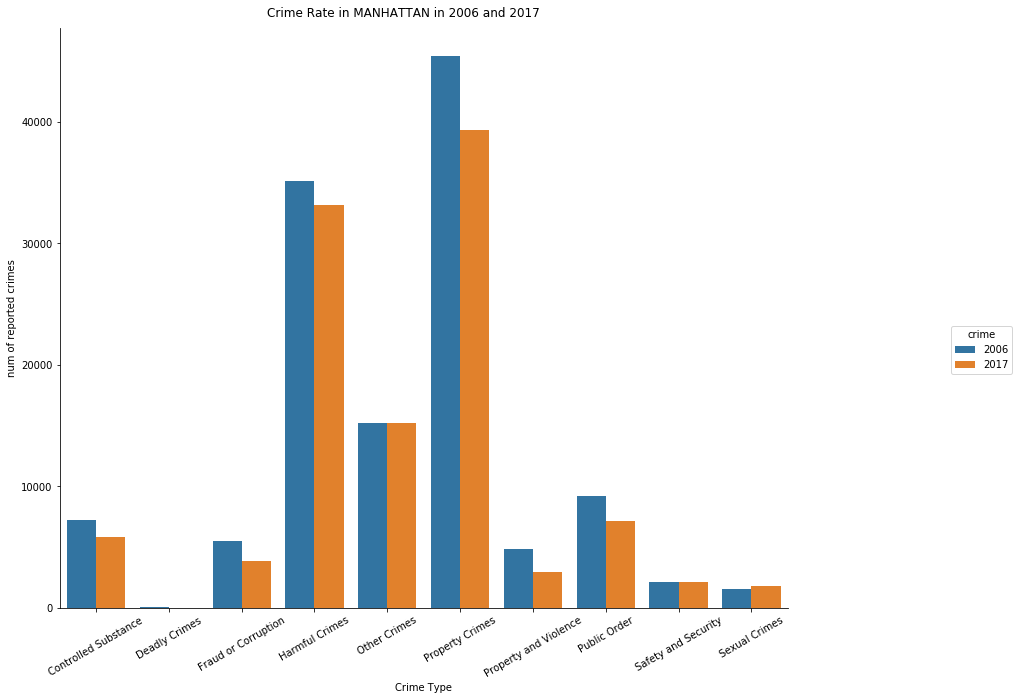

In [47]:
#Crime rates in Manhattan by Crime
plot_by_borough(data_2006_c, data_2017_c, "MANHATTAN")

Percentage change in Controlled Substance from 2006 to 2017 is -33.209233060312734
Percentage change in Deadly Crimes from 2006 to 2017 is -19.444444444444446
Percentage change in Fraud or Corruption from 2006 to 2017 is -28.174235403151066
Percentage change in Harmful Crimes from 2006 to 2017 is -3.33030970584424
Percentage change in Other Crimes from 2006 to 2017 is 2.3446814147569213
Percentage change in Property Crimes from 2006 to 2017 is -21.183996344632607
Percentage change in Property and Violence from 2006 to 2017 is -36.392333709131904
Percentage change in Public Order from 2006 to 2017 is -31.845018450184504
Percentage change in Safety and Security from 2006 to 2017 is -16.658619024625786
Percentage change in Sexual Crimes from 2006 to 2017 is -17.346938775510203


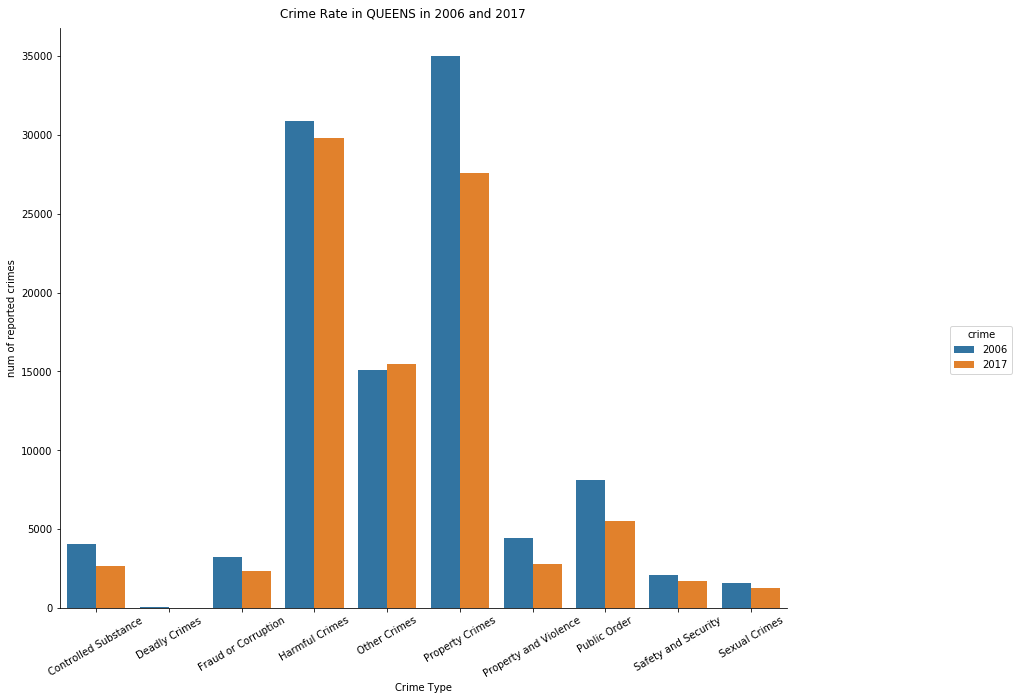

In [48]:
#Crime rates in Queens by Crime
plot_by_borough(data_2006_c, data_2017_c, "QUEENS")

Percentage change in Controlled Substance from 2006 to 2017 is -29.034941763727122
Percentage change in Deadly Crimes from 2006 to 2017 is -80.0
Percentage change in Fraud or Corruption from 2006 to 2017 is -33.01088270858525
Percentage change in Harmful Crimes from 2006 to 2017 is -9.654541294898193
Percentage change in Other Crimes from 2006 to 2017 is -23.640399556048834
Percentage change in Property Crimes from 2006 to 2017 is -28.076718167288227
Percentage change in Property and Violence from 2006 to 2017 is -36.33916554508748
Percentage change in Public Order from 2006 to 2017 is -38.49980864906238
Percentage change in Safety and Security from 2006 to 2017 is -23.28159645232816
Percentage change in Sexual Crimes from 2006 to 2017 is -20.80745341614907


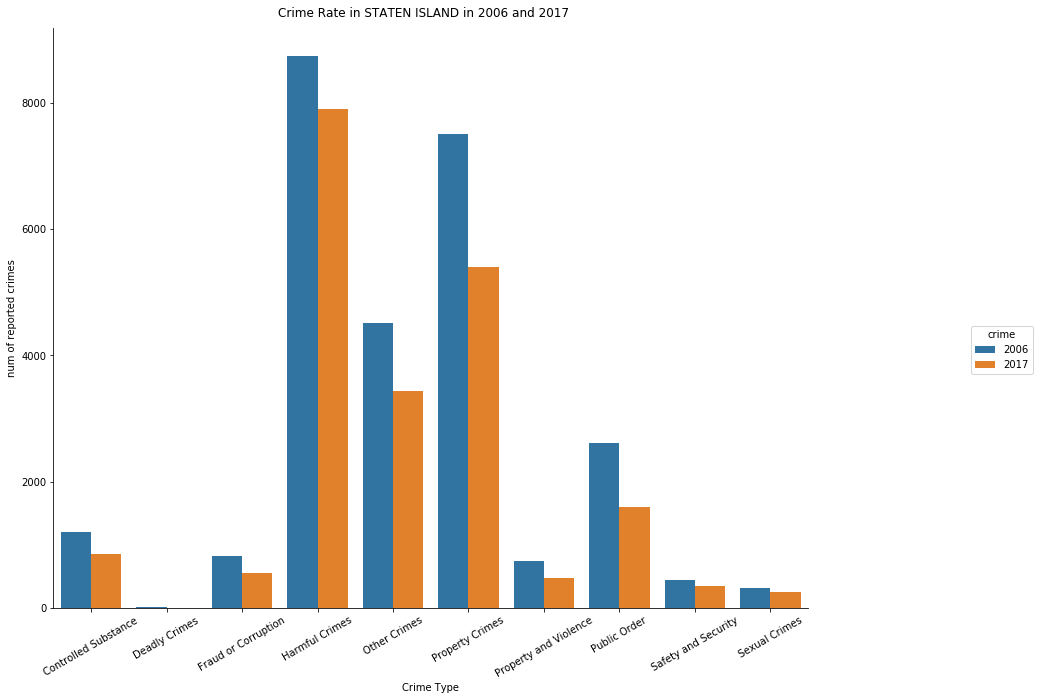

In [49]:
#Crime rates in Staten Island by Crime
plot_by_borough(data_2006_c, data_2017_c, "STATEN ISLAND")

The plots along with the data give a clear picture of how the reported crimes for each category have changed from 2006 to 2017. Most types of crimes in the different boroughs have witnessed a decrease. However, there are a few exceptions that need to be pointed out.

    - Other crimes, defined as crimes that do not belong to any of the other broader categories, has seen an increase in 4 of the 5 boroughs; Bronx +4.05%, Brooklyn +0.4%, Manhattan +0.29% and Queens +2.34%. 
    - Harmful crimes increased in the Bronx by 0.43%.
    - Sexual crimes increased in Manhattan by 17.28%.

To conclude, my hypothesis wasn't entirely correct. Some crimes actually witnessed an increase in the boroughs.

## Research Question 4: Is there any element of seasonality with regards to the number of crimes committed?

My hypothesis is that crime rates increase during the holiday period due to more number of people gathering in public places, the need for money during the holiday season etc. In order to test this hypothesis, the best approach would be to use a time series graph to examine total occurrences of crime. That is what I do below.

In [51]:
#prepare data for plotting
data_2006_rq4 = copy.deepcopy(data_2006)
data_2006_rq4.set_index('CMPLNT_FR_DT', inplace=True)
data_2006_rq4.index = pd.to_datetime(data_2006_rq4.index)

data_2017_rq4 = copy.deepcopy(data_2017)
data_2017_rq4.set_index('CMPLNT_FR_DT', inplace=True)
data_2017_rq4.index = pd.to_datetime(data_2017_rq4.index)

In [52]:
#resample the data to get weekly counts
data_2006_rq4 = data_2006_rq4['CMPLNT_NUM'].resample('W', how='count')
data_2017_rq4 = data_2017_rq4['CMPLNT_NUM'].resample('W', how='count')

Text(0,0.5,'Number of Crimes')

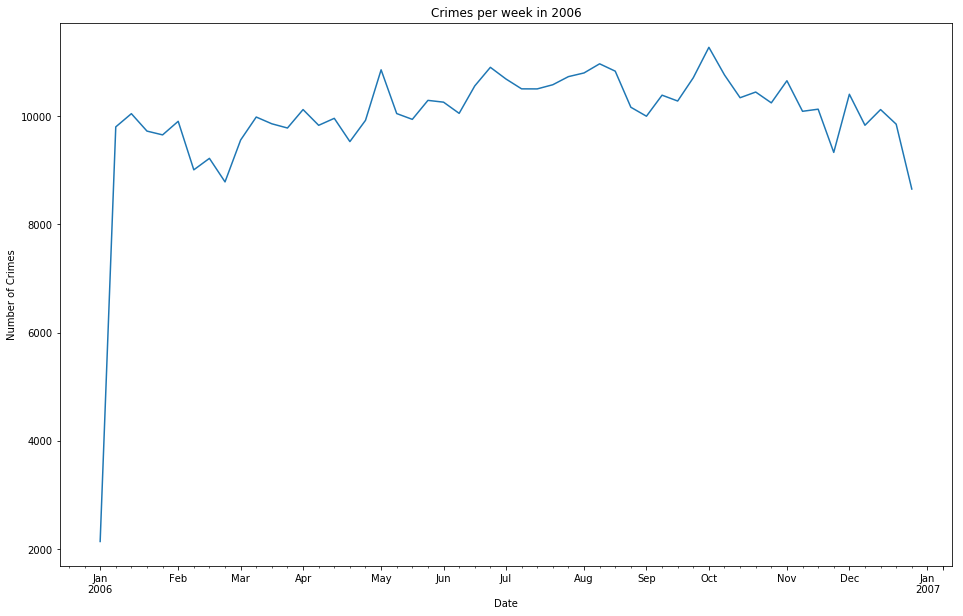

In [53]:
ax=data_2006_rq4.plot(title="Crimes per week in 2006", figsize=(16,10))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Crimes")

Text(0,0.5,'Number of Crimes')

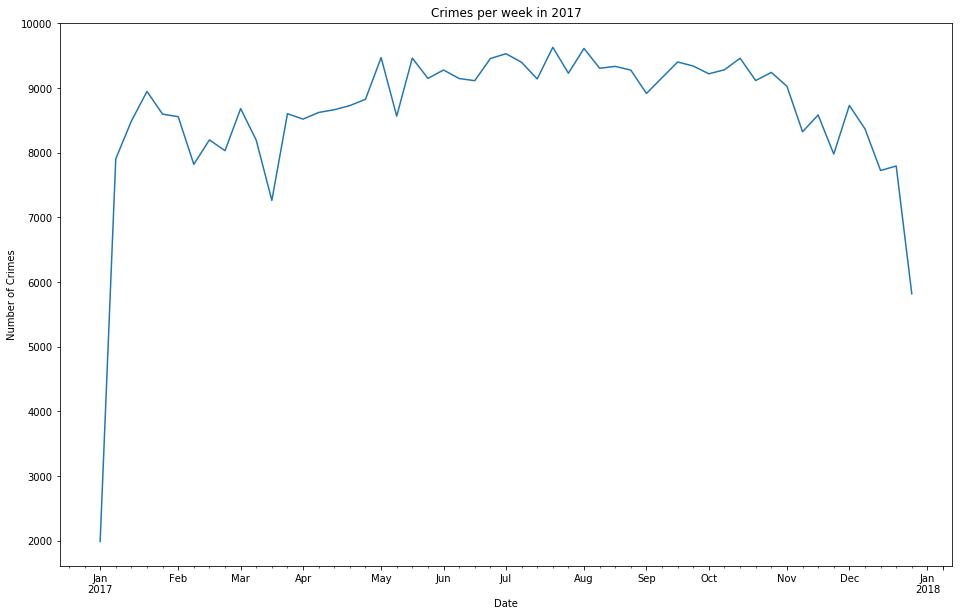

In [54]:
ax=data_2017_rq4.plot(title="Crimes per week in 2017", figsize=(16,10))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Crimes")

In [55]:
data_2006_rq4

CMPLNT_FR_DT
2006-01-01     2137
2006-01-08     9802
2006-01-15    10046
2006-01-22     9724
2006-01-29     9654
2006-02-05     9905
2006-02-12     9008
2006-02-19     9220
2006-02-26     8785
2006-03-05     9559
2006-03-12     9984
2006-03-19     9859
2006-03-26     9781
2006-04-02    10122
2006-04-09     9831
2006-04-16     9960
2006-04-23     9530
2006-04-30     9923
2006-05-07    10857
2006-05-14    10048
2006-05-21     9941
2006-05-28    10292
2006-06-04    10259
2006-06-11    10052
2006-06-18    10559
2006-06-25    10903
2006-07-02    10687
2006-07-09    10505
2006-07-16    10504
2006-07-23    10581
2006-07-30    10731
2006-08-06    10799
2006-08-13    10968
2006-08-20    10832
2006-08-27    10165
2006-09-03     9999
2006-09-10    10388
2006-09-17    10280
2006-09-24    10710
2006-10-01    11273
2006-10-08    10762
2006-10-15    10341
2006-10-22    10446
2006-10-29    10246
2006-11-05    10655
2006-11-12    10090
2006-11-19    10129
2006-11-26     9330
2006-12-03    10405
2006-12

In [56]:
data_2017_rq4

CMPLNT_FR_DT
2017-01-01    1986
2017-01-08    7904
2017-01-15    8489
2017-01-22    8947
2017-01-29    8596
2017-02-05    8557
2017-02-12    7820
2017-02-19    8198
2017-02-26    8031
2017-03-05    8682
2017-03-12    8193
2017-03-19    7262
2017-03-26    8603
2017-04-02    8519
2017-04-09    8622
2017-04-16    8665
2017-04-23    8728
2017-04-30    8827
2017-05-07    9471
2017-05-14    8566
2017-05-21    9463
2017-05-28    9149
2017-06-04    9279
2017-06-11    9147
2017-06-18    9114
2017-06-25    9456
2017-07-02    9531
2017-07-09    9398
2017-07-16    9141
2017-07-23    9630
2017-07-30    9229
2017-08-06    9613
2017-08-13    9306
2017-08-20    9335
2017-08-27    9277
2017-09-03    8916
2017-09-10    9160
2017-09-17    9403
2017-09-24    9340
2017-10-01    9220
2017-10-08    9283
2017-10-15    9461
2017-10-22    9116
2017-10-29    9242
2017-11-05    9027
2017-11-12    8324
2017-11-19    8583
2017-11-26    7979
2017-12-03    8731
2017-12-10    8369
2017-12-17    7724
2017-12-24    7794

I've plotten two time series graphs here, one for the year 2006 and the other for 2017. Each point on the graph represents a count of the number of reported crimes on a weekly basis. 

Looking at the graphs, and also at the raw numbers, crime appears to be really low at the beginning of the year. After the first quarter of the year, it increases and stays constant for much of the summer and fall, and then surprisingly, very slightly falls during the holiday period. 

I expected crime to spike during the holiday season, but it appears to slightly decrease or stay mostly constant. This is very suprising to me, as I though the need for resources like money during this period would lead to a spike in crime. It looks like my hypothesis was entirely wrong.

## Crime in New York City: How the City Improved the Situation

Despite being the largest city in the world, NYC has definitely been making headway with respect to controlling crime and ensuring that crime continues to decrease. New York city was crime ridden during the late 1980s, with a large number of crimes in the area of murder, burglaries, thefts etc. 

The NYPD initially tried to start an operation to clean up the city and reduce crime. They called this Operation Crossroads. Unfortunately, changing policing strategies or increasing patrol operations will not help solve the problem. In most cases, the problem needs to be solved in other ways. Police cannot be cited as a solution to every problem involving crime or criminal activity. The fact that these attempts were in vain went a long way and ultimately helped the city devise a new strategy that actually worked<sup>[5]</sup>.

The cities plethora of agencies worked together to restore public order and safety, and this is how real progress was made. One strategy that they used was hiring homeless to clean up the streets. The benefit from this was two fold, the city became cleaner and the homeless found a new source of income. 

Another improvement devised by the city was the need to improve public transportation. Fare beating was an issue before, and the New York City Transit Authority decided to take action. In addition to combatting fare beating, they began removing graffiti from subway trains. 

Basically, by improving infrastructure, schools and public order, the city indirectly improved the state of crime. This is an important lesson for city planners and governments of cities like Chicago and Los Angeles which are still ridden with crime. The police aren't the solution to all problems. Crime often has origins in other issues plaguing the city.

## Data Limitations

### Lots of missing values in certain columns

Some columns (columns that I don't use in this research) has a large number of missing values. For examples, PARKS_NM and HADEVELOPT have approximately 450,000 missing values. There is no point in including these features as a part of the dataset, since there are so many missing values in these. Suspect race and sex also contain a large number of missing values, which would impede someones research efforts in the case that they use these columns. I don't conduct my research with these features, so there is no impediment to my research. 

### No unreported crime data

This is more a limitation not with this data, but with the data that is available online. There isn't a good source of data on unreported crime. I would love to have such a data source to determine reasons and examine numbers on unreported crimes. 

## Future Work

This analysis used data from just two years; 2006 and 2017. Extending the research to each year between 2006 and 2017 and extending it on a yearly basis would probably be even more beneficial for people who want to get a deeper analysis into the data. Also, additional data is added each year, so making sure the project is updated every year that new data is released would probably be beneficial. 

## Conclusion

Bigger cities offer a number of advantages to their citizens. However, maintaining order in these cities isn't easy, and this often leads to higher rates of crime compared to smaller cities and suburbs. New York City, however, is one of very few cities in this world that have good control over criminal activity.

By approaching the problem from a different point of view, the government and its many divisions were successful in transforming the city from its former past as a crime ridden mess to one of the safest large cities in the world.

Through my analysis, I was able to confirm that crime has fallen from 2006 to 2017. The magnitude by which crime's fallen is quite large. The city has done a lot to improve the conditions of its citizens and harber an environment that reduces the occurrence of crime. 

Crimes in the city have fallen, whatever angle you look at it from. Some categories have witnessed an increase in the boroughs, but the overall rate of crime has fallen. 

The New York City Open Data project is an absolutely great effort by the city. By providing this vast amount of data to the people, it enables better analysis and research. It also indirectly enables better analysis and can potentially protect people from being victims of crime. 

## References

[1] https://en.wikipedia.org/wiki/New_York_City%C2%A0

[2] https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

[3] https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

[4] https://www.nap.edu/catalog/23492/modernizing-crime-statistics-report-1-defining-and-classifying-crime

[5] https://www.city-journal.org/html/how-new-york-became-safe-full-story-13197.html